In [18]:
# This cell is used for Creation of model

import joblib
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import gzip
from tensorflow.keras.datasets  import mnist
# from tensorflow.keras.utils  import to_categorical

def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    nsamples, nx, ny = trainX.shape
    trainX = trainX.reshape((nsamples, nx*ny ))
    nsamples, nx, ny = testX.shape
    testX = testX.reshape((nsamples, nx*ny))

    # trainY = to_categorical(trainY)
    # testY = to_categorical(testY)
    return trainX, trainY, testX, testY


def process_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize the pixel range from 0-255 to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

def main():
    print('loading dataset...')
    trainX, trainY, testX, testY = load_dataset()
    trainX,testX = process_pixels(trainX,testX)

    print('training model...')
    classifier = SVC()
    classifier.fit(trainX,trainY)

    print('Evaluating model... ')
    
    accuracy = classifier.score(testX,testY)
    print('Accuracy: ',accuracy*100)

    joblib.dump(classifier,'svm_model.gz',compress=('gzip',3))
    print('Modal saved')

main()

loading dataset...
training model...
Evaluating model... 
Accuracy:  97.92
Modal saved


loading dataset...
loading model...
actual    : 2
predicted : 2


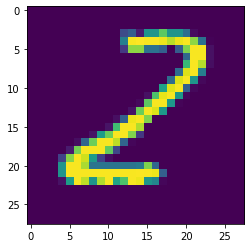

In [33]:
# This cell is used for prediction process

import joblib
import gzip
from matplotlib import pyplot
from tensorflow.keras.datasets  import mnist
import numpy as np
from random import randint

def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    nsamples, nx, ny = trainX.shape
    trainX = trainX.reshape((nsamples, nx*ny ))
    
    nsamples, nx, ny = testX.shape
    testX = testX.reshape((nsamples, nx*ny))

    # trainY = to_categorical(trainY)
    # testY = to_categorical(testY)
    return trainX, trainY, testX, testY


def process_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize the pixel range from 0-255 to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm


def main():
    print('loading dataset...')
    trainX, trainY, testX, testY = load_dataset()
    trainX,testX = process_pixels(trainX,testX)

    print('loading model...')
    classifier =  joblib.load('svm_model.gz')
    
    # random index from testX     
    index = randint(0,testX.shape[0])
        
    digit = classifier.predict([testX[index]])
    
    # converting a single dimentional image array to 2 dimentional     
    image_1d = np.array(testX[index])
    image_2d = image_1d.reshape(28,28)
    pyplot.imshow(image_2d)
    
    print('actual    :',testY[index])
    print('predicted :',digit[0])
    
main()